# **OCR Text Extraction Example Using Repository Methods**

In [5]:
import sys
from pathlib import Path

# Add the vector_storage path to sys.path
vector_path = Path("endpoint-api/src")
sys.path.append(str(vector_path))
from vector_storage.ocr import OCRProcessor

processor = OCRProcessor()
# Simple Text Extraction
text = processor.extract_text("sample-data/mad-hatter-tea-party.png")
print("Extracted Text:")
print(text[:300])

INFO:vector_storage.ocr:OCRProcessor initialized with default preprocessing pipeline
INFO:vector_storage.ocr:Starting text extraction (lang: eng, config: --psm 6)
INFO:vector_storage.ocr:Reading image from path: sample-data/mad-hatter-tea-party.png


Extracted Text:
Alice in Wonderland co
emer fitter
Le
Bese
‘The Mad Hatter’s Tea Party

There was a tree in front of the house. Under the tree
was a big table with a lot of chairy round it, But there
were only three at the table: the Mad Hatter, the March
Hare and a large brown mouse. The Mouse sat berween
the Mad 


- Full text:

Extracted Text:
Alice in Wonderland co
emer fitter
Le
Bese
‘The Mad Hatter’s Tea Party

There was a tree in front of the house. Under the tree
was a big table with a lot of chairy round it, But there
were only three at the table: the Mad Hatter, the March
Hare and a large brown mouse. The Mouse sat berween
the Mad Hatter and the March Hare. It was asleep, so they
talked over its head

When they saw Alice, they cried, ‘No, no, you can’t sit
here! There isn'ta place for you!”

“There are a lot of places? Alice said. She sat down in a
chair at one end of the table

“Have some wine’ the Mad Hatter sid politely

Alice looked round the table but there was only tea

“I don’t see any wine’ she answered

“There isn't any? said the March Hare

“Then why did you say, “Have some wine”? It wasn't
very polite of you. Alice sai angrily

“We didn't invite you to tea, but you came. That wasn't
very polite of you said the March Hare.

“No, it wasn't. Cut your hait!” said the Mad Hatter,

‘ileal ail Whee ee |


In [6]:
result = processor.extract_text_with_data(
    "sample-data/mad-hatter-tea-party.png",
    min_confidence=40
    )
print("\nFiltered Text with Confidence > 40:")
print(result['text'])

INFO:vector_storage.ocr:Starting detailed extraction (conf: 40%)



Filtered Text with Confidence > 40:
Alice in Wonderland co ‘The Mad Hatter’s Tea Party There was a tree in front of the house. Under the tree was a big table with a lot of chairy round it, But there were only three at the table: the Mad Hatter, the March Hare and a large brown mouse. The Mouse sat the Mad Hatter and the March Hare. It was asleep, so they talked over its head When they saw Alice, they cried, ‘No, no, you can’t sit here! There isn'ta place for you!” “There are a lot of places? Alice said. She sat down in a chair at one end of the table “Have some wine’ the Mad Hatter sid politely Alice looked round the table but there was only tea “I don’t see any wine’ she answered “There isn't any? said the March Hare “Then why did you say, “Have some wine”? It wasn't very polite of you. Alice sai angrily “We didn't invite you to tea, but you came. That wasn't very polite of you said the March Hare. “No, it wasn't. Cut your said the Mad Hatter, |


INFO:vector_storage.ocr:Starting detailed extraction (conf: 40%)


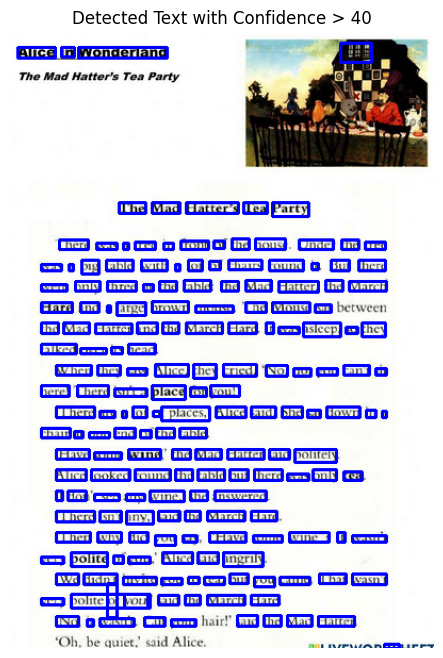

In [ ]:
from matplotlib import pyplot as plt
import cv2

result = processor.extract_text_with_data("sample-data/mad-hatter-tea-party.png", min_confidence=40, return_image_with_boxes=True)

# Display
plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(result['image'], cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Detected Text with Confidence > 40")
plt.show()

The method `extract_text_with_data` uses Tesseract OCR to extract text from an image along with metadata like bounding boxes and confidence scores. Additionally, it's possible to draw rectangles around the detected text, which helps visually confirm what was detected by OCR.

# **Retrieval Example using LangChain + ChromaDB**

In [1]:
import sys
from pathlib import Path

# Add streamlit/src to sys.path for imports
streamlit_src = Path.cwd() / "streamlit" / "src"
if str(streamlit_src) not in sys.path:
    sys.path.append(str(streamlit_src))

from chatbot.chatbot_utils import VectorUtils 

vectorstore = VectorUtils(persist_dir='chromadb') # chromadb is at same levelin this file

INFO:chatbot.chatbot_utils:Initializing VectorUtils for collection 'documents' at 'chromadb'
INFO:chromadb.telemetry.product.posthog:Anonymized telemetry enabled. See                     https://docs.trychroma.com/telemetry for more information.
INFO:chatbot.chatbot_utils:Using existing collection: 'documents'


In [ ]:
vectorstore.count_documents() # 11 was the chunks for this folder, 
# it's also the response from api that it appears in streamlit after send a file :)

INFO:chatbot.chatbot_utils:Document count in collection 'documents': 11


11

In [8]:
# testing retriever
print(vectorstore.query_docs("Me fale sobre sereias na cultura africana"))

INFO:chatbot.chatbot_utils:Querying collection 'documents' for: 'Me fale sobre sereias na cultura africana' (top 5)
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


{'ids': [['6e7ea296-d0ef-4685-a5bf-a886c51fc6ac', 'e03113e4-7524-40da-8b87-e2331d5f3dd0', '220df551-f385-4f03-98c9-40eb133f0bab', '9602acf0-1121-4860-8513-4a5847442d48', '4a4d9162-2bb1-4368-a909-d74fa702f0ee']], 'embeddings': None, 'documents': [['a mermaid. mermaids are present in many cultures worldwide, including europe, asia, africa, and the americas. the western image of mermaids as beautiful, seductive singers may have been influenced by greek sirens, who were originally half-bird creatures.', 'curiosities in african lore, mami wata is a water spirit linked to fertility and wealth. in japan, the ningyo is a mermaid-like creature with a human face and fish body. scandinavian myths tell of mermaids who could shapeshift and see the future. mermaids', 'and literature for thousands of years closing ● mermaids continue to captivate the human imagination with their blend of beauty, mystery, and magic. ● from ancient goddesses to modern pop culture, they represent fertility, danger, and 

In [9]:
print(vectorstore.query_docs("Curiosidades sobre sereias"))

INFO:chatbot.chatbot_utils:Querying collection 'documents' for: 'Curiosidades sobre sereias' (top 5)
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


{'ids': [['9602acf0-1121-4860-8513-4a5847442d48', '472fccdd-e94f-4c30-97df-a2e4ebe83131', '220df551-f385-4f03-98c9-40eb133f0bab', '4a4d9162-2bb1-4368-a909-d74fa702f0ee', 'e03113e4-7524-40da-8b87-e2331d5f3dd0']], 'embeddings': None, 'documents': [['as derketo. greek sirens evolved from bird-like to fish-tailed women in later periods. mermaids were often seen as omens of shipwrecks and storms, or as protectors who could bestow blessings. famous sightings were reported by explorers such as columbus', 'were originally half-bird creatures. historical accounts, like those of christopher columbus, likely mistook manatees for mermaids. mermaid legends span the middle east, europe, and asia. atargatis was known to greeks as derketo. greek sirens evolved from', 'and literature for thousands of years closing ● mermaids continue to captivate the human imagination with their blend of beauty, mystery, and magic. ● from ancient goddesses to modern pop culture, they represent fertility, danger, and en

In [11]:
print(vectorstore.query_docs("Who was Atargatis in Assyrian mythology?"))

INFO:chatbot.chatbot_utils:Querying collection 'documents' for: 'Who was Atargatis in Assyrian mythology?' (top 5)
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


{'ids': [['472fccdd-e94f-4c30-97df-a2e4ebe83131', '4a4d9162-2bb1-4368-a909-d74fa702f0ee', '9602acf0-1121-4860-8513-4a5847442d48', 'e03113e4-7524-40da-8b87-e2331d5f3dd0', '0203f7f6-f7e3-4fa0-89e6-6bff1ed9713b']], 'embeddings': None, 'documents': [['were originally half-bird creatures. historical accounts, like those of christopher columbus, likely mistook manatees for mermaids. mermaid legends span the middle east, europe, and asia. atargatis was known to greeks as derketo. greek sirens evolved from', 'overview about mermaids history mermaids have appeared in human folklore for millennia, with the earliest stories from assyrian mythology around 1000 bc, such as the goddess atargatis who transformed herself into a mermaid. mermaids are present in many', 'as derketo. greek sirens evolved from bird-like to fish-tailed women in later periods. mermaids were often seen as omens of shipwrecks and storms, or as protectors who could bestow blessings. famous sightings were reported by explorers s

In [12]:
print(vectorstore.query_docs("How did Greek sirens originally appear?"))

INFO:chatbot.chatbot_utils:Querying collection 'documents' for: 'How did Greek sirens originally appear?' (top 5)
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


{'ids': [['9602acf0-1121-4860-8513-4a5847442d48', '472fccdd-e94f-4c30-97df-a2e4ebe83131', '6e7ea296-d0ef-4685-a5bf-a886c51fc6ac', '4a4d9162-2bb1-4368-a909-d74fa702f0ee', '0203f7f6-f7e3-4fa0-89e6-6bff1ed9713b']], 'embeddings': None, 'documents': [['as derketo. greek sirens evolved from bird-like to fish-tailed women in later periods. mermaids were often seen as omens of shipwrecks and storms, or as protectors who could bestow blessings. famous sightings were reported by explorers such as columbus', 'were originally half-bird creatures. historical accounts, like those of christopher columbus, likely mistook manatees for mermaids. mermaid legends span the middle east, europe, and asia. atargatis was known to greeks as derketo. greek sirens evolved from', 'a mermaid. mermaids are present in many cultures worldwide, including europe, asia, africa, and the americas. the western image of mermaids as beautiful, seductive singers may have been influenced by greek sirens, who were originally hal

In [5]:
# adding the .png file and testing it
print(vectorstore.query_docs("Did Alice find any wine at the tea party?"))

INFO:chatbot.chatbot_utils:Querying collection 'documents' for: 'Did Alice find any wine at the tea party?' (top 5)
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


{'ids': [['71aaef11-c965-4001-adb1-f3e240da4e14', 'f9cc7b78-1b02-4edc-a87c-2909168f5243', 'dbc87cdd-7dfb-4a06-8d88-33f62cad5fcc', '437b428a-643a-4222-a62b-290b04868994', 'ea159db2-ec42-49d6-9d21-5b46d79e4fe7']], 'embeddings': None, 'documents': [["you can’t sit here there isn'ta place for you!” “there ae alot of places’ alice sai, she st down in a chair at one end ofthe table “have some wine; the mad hater said politely alice looked round the table but there was only tea “there isn any suid the", "you can’t sit here there isn'ta place for you!” “there ae alot of places’ alice sai, she st down in a chair at one end ofthe table “have some wine; the mad hater said politely alice looked round the table but there was only tea “there isn any suid the", 'alice in wonderland | 7) the mad hater’ ton party cather ig pr ts) ‘the mad hatter’s tea party there was a tree infront ofthe house. under the tree was a big table wich a lo of chairs round it. but there were only three at the table: the mad 

In [6]:
print(vectorstore.query_docs("How did the March Hare respond when Alice said there was no wine?"))

INFO:chatbot.chatbot_utils:Querying collection 'documents' for: 'How did the March Hare respond when Alice said there was no wine?' (top 5)
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


{'ids': [['75c899ae-24f3-445f-9180-75655b5ecf18', '5a9de59d-e614-4bbc-8e0d-2dcc12fb038d', '6edd62bd-269b-4565-8806-9f27658ff356', 'ea159db2-ec42-49d6-9d21-5b46d79e4fe7', '31fcad3e-c551-475e-8563-21abc0b1d646']], 'embeddings': None, 'documents': [["three at the table: the mad hatter, the march hare and a lage brown mouse. the mouse sat between the mad hatter and the march hare. it was asleep, so they talked over its head when they saw alice, they cried, ‘no, no, you can’t sit here there isn'ta place", "three at the table: the mad hatter, the march hare and a lage brown mouse. the mouse sat between the mad hatter and the march hare. it was asleep, so they talked over its head when they saw alice, they cried, ‘no, no, you can’t sit here there isn'ta place", "was only tea “there isn any suid the march hare very polite of you, alice sid angrily. “we didn't invite you to tea, but you came, that wast very polite of you! sul the march hare. “no, it wasn't. cut your hair!” said the mad hatter, 

In [7]:
print(vectorstore.query_docs("Where did Alice sit when she joined the tea party?"))

INFO:chatbot.chatbot_utils:Querying collection 'documents' for: 'Where did Alice sit when she joined the tea party?' (top 5)
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


{'ids': [['75c899ae-24f3-445f-9180-75655b5ecf18', '5a9de59d-e614-4bbc-8e0d-2dcc12fb038d', '71aaef11-c965-4001-adb1-f3e240da4e14', 'f9cc7b78-1b02-4edc-a87c-2909168f5243', '437b428a-643a-4222-a62b-290b04868994']], 'embeddings': None, 'documents': [["three at the table: the mad hatter, the march hare and a lage brown mouse. the mouse sat between the mad hatter and the march hare. it was asleep, so they talked over its head when they saw alice, they cried, ‘no, no, you can’t sit here there isn'ta place", "three at the table: the mad hatter, the march hare and a lage brown mouse. the mouse sat between the mad hatter and the march hare. it was asleep, so they talked over its head when they saw alice, they cried, ‘no, no, you can’t sit here there isn'ta place", "you can’t sit here there isn'ta place for you!” “there ae alot of places’ alice sai, she st down in a chair at one end ofthe table “have some wine; the mad hater said politely alice looked round the table but there was only tea “there

In [8]:
print(vectorstore.query_docs("What animal was sitting between the Mad Hatter and the March Hare?"))

INFO:chatbot.chatbot_utils:Querying collection 'documents' for: 'What animal was sitting between the Mad Hatter and the March Hare?' (top 5)
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


{'ids': [['75c899ae-24f3-445f-9180-75655b5ecf18', '5a9de59d-e614-4bbc-8e0d-2dcc12fb038d', '437b428a-643a-4222-a62b-290b04868994', 'dbc87cdd-7dfb-4a06-8d88-33f62cad5fcc', 'ea159db2-ec42-49d6-9d21-5b46d79e4fe7']], 'embeddings': None, 'documents': [["three at the table: the mad hatter, the march hare and a lage brown mouse. the mouse sat between the mad hatter and the march hare. it was asleep, so they talked over its head when they saw alice, they cried, ‘no, no, you can’t sit here there isn'ta place", "three at the table: the mad hatter, the march hare and a lage brown mouse. the mouse sat between the mad hatter and the march hare. it was asleep, so they talked over its head when they saw alice, they cried, ‘no, no, you can’t sit here there isn'ta place", 'alice in wonderland | 7) the mad hater’ ton party cather ig pr ts) ‘the mad hatter’s tea party there was a tree infront ofthe house. under the tree was a big table wich a lo of chairs round it. but there were only three at the table: 